[0.09753911 0.17060897 0.12128179 0.04089615 0.02978888 0.53988509]
Feature ranking:
1. MLOGP (0.539885) (0.032277)
2. SM1_DZ (0.170609) (0.023582)
3. GATS1I (0.121282) (0.023989)
4. CIC0 (0.097539) (0.020636)
5. NDSCH (0.040896) (0.012996)
6. NDSSC (0.029789) (0.011444)


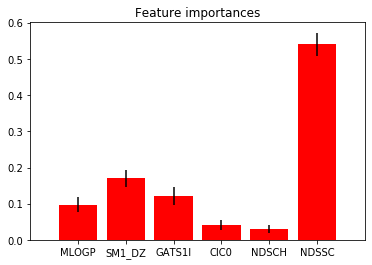

In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt

X = pd.read_csv('data/fish_toxicity.csv')
y = X.pop('QR').values

model = RandomForestRegressor(n_estimators=250, random_state=0)
model.fit(X, y)

importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print(importances)

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f) (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]], std[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(indices, importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices])
plt.xlim([-1, X.shape[1]])
plt.show()